In [1]:
%matplotlib inline

import json
from pathlib import Path
from collections import Counter

import numpy as np
import pandas as pd

In [2]:
data = json.loads(Path('../data/gen7vgc2018_dataset.json').read_text())

In [3]:
counter = Counter()
pokes = data['train'] + data['valid']
for poke in pokes:
    if not poke:
        continue
    counter.update(poke)

In [4]:
names, freqs = zip(*counter.most_common())
df = pd.DataFrame([freqs], columns=names, index=['freq']).T
df.head()

,freq
landorustherian,3174
tapukoko,2240
tapufini,1869
incineroar,1622
tapulele,1582


In [5]:
upper = df.freq.sum() * 0.95
df[df.freq.cumsum() < upper].shape

(122, 1)

In [6]:
df['ratio'] = df.freq / df.freq.sum()
df['cumsum_ratio'] = df.ratio.cumsum()
df.shape

(433, 3)

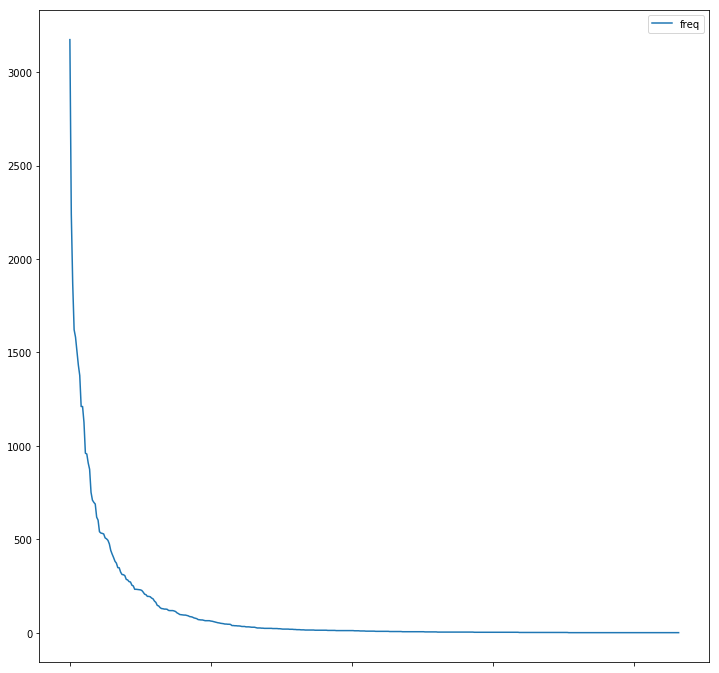

In [7]:
df.plot(y='freq', figsize=(12, 12))

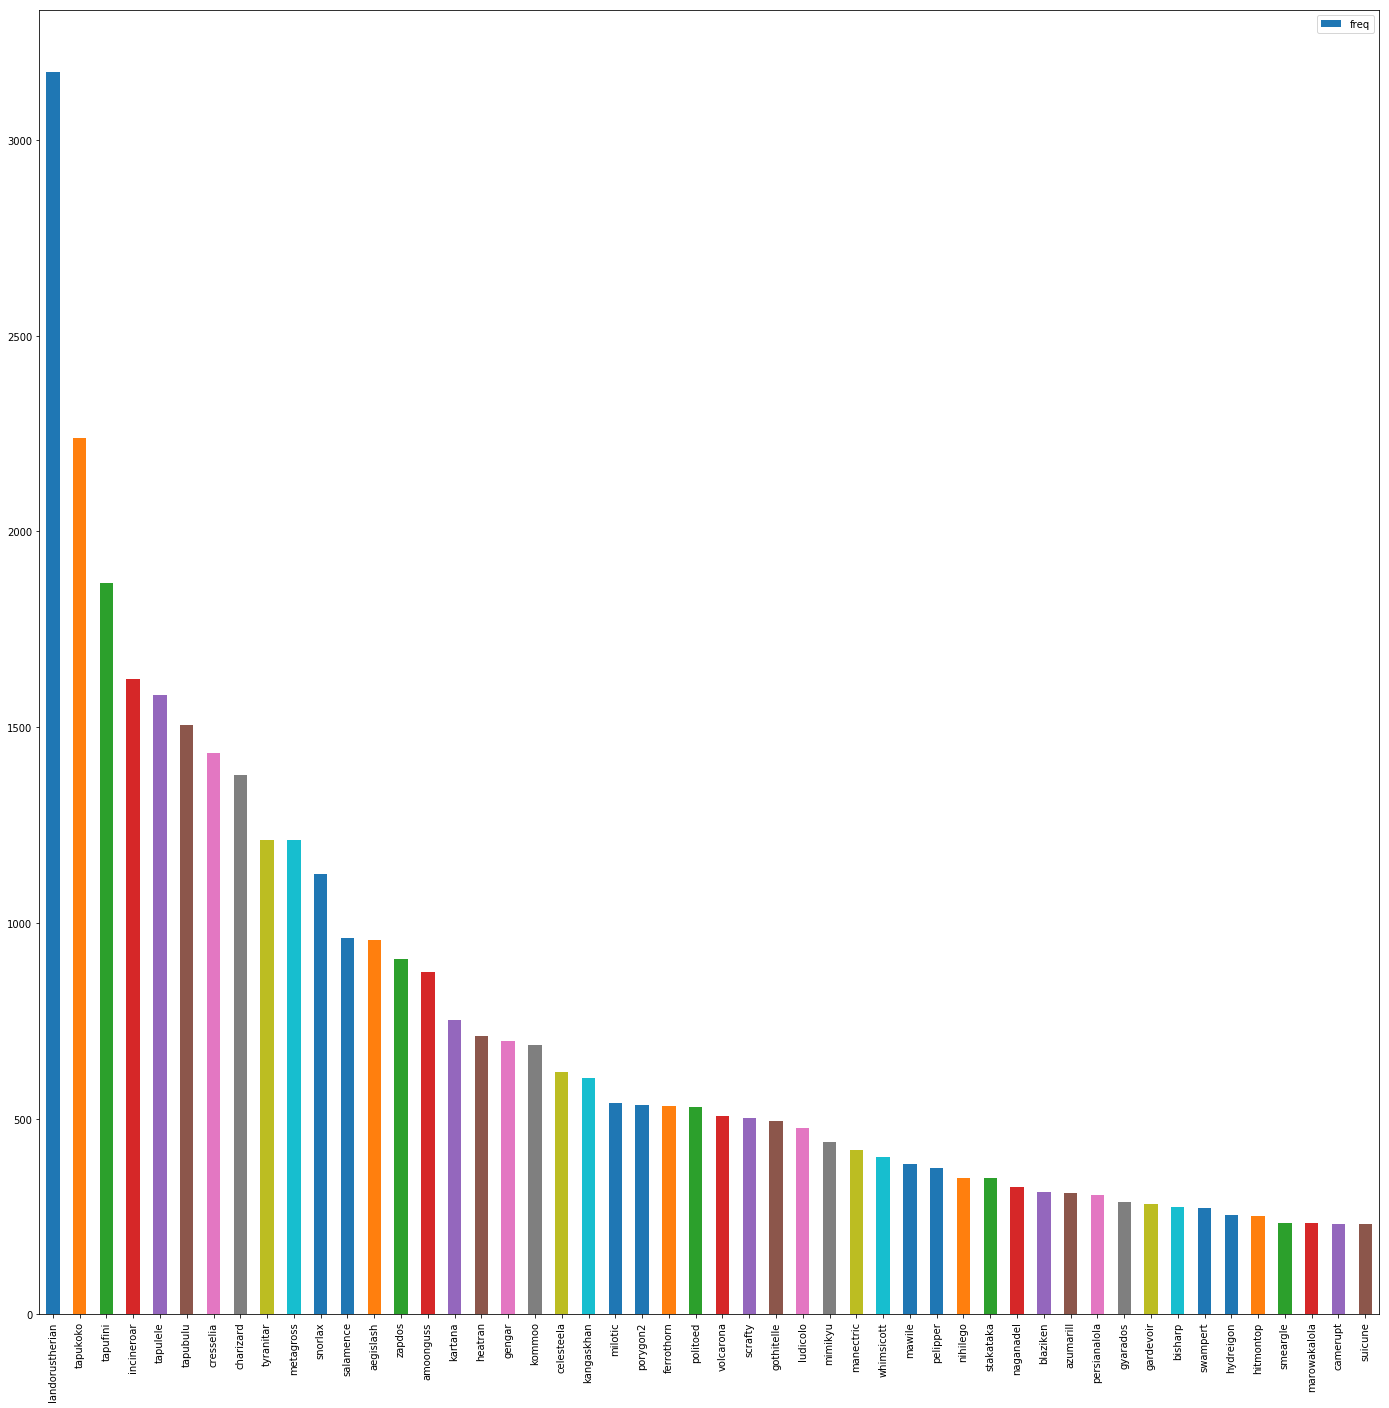

In [8]:
df[:50].plot(y='freq', kind='bar', figsize=(24, 24))